<strong>Name:</strong> Muhammad Ahmed Javed


<strong>Role:</strong> Sports Analysts

---

<strong>Project Title:</strong> Exploratory Data Analysis


<strong>Project Task:</strong>

* Perform "EDA" on dataset "Indian Premier League"
* As a Sports Analysts find out the most successful teams,players and factors contributing win or loss of a team
* Suggest teams/players a company should endorse for its products
* <strong> Advanced Level:</strong> Create storyboards.Use annotations,animation and images.

---

<strong>Setup & Libraries</strong>


In [ ]:
!pip install plotly dash opencv-python
!pip install dash-core-components dash-html-components plotly
!pip install --upgrade dash plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 70.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


<ipython-input-2-115dec8c5550>:9: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-2-115dec8c5550>:10: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


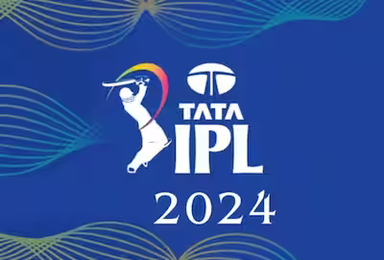

In [ ]:
# @title
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/TATA_IPL_2024_Logo.png')
if img is not None:
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Error: Unable to load the image.")

In [ ]:
file_deliverable=pd.read_csv("deliveries.csv")
file_matches=pd.read_csv("matches.csv")
file_deliverable.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [ ]:
file_matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [ ]:
file_deliverable.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
file_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

Here we have 'match_id' (foreign key) As I am using python therefor I am using Inner Join Concept to join these tables

In [ ]:
file=pd.merge(file_deliverable,file_matches,left_on='match_id',right_on='id',how='inner')
file.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [ ]:
file.shape

(179078, 39)

In [ ]:
file.drop_duplicates(inplace=True)
file.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
u

In [ ]:
for i in file.columns:
      if any(file[i].isnull()):
           if file[i].dtype=='int64' or file[i].dtype=='float64' :
               file[i].fillna(file[i].mean(),inplace=True)
           elif file[i].dtype=='object':
               file[i].fillna(file[i].mode().iloc[0],inplace=True)
file.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
id                  0
season              0
city                0
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner              0
win_by_runs         0
win_by_wickets      0
player_of_match     0
venue               0
umpire1             0
umpire2             0
umpire3             0
dtype: int64

In [ ]:
file.drop_duplicates(inplace=True)
file.shape

(179055, 39)

Removing Outliers:

In [ ]:
def remove_outliers(data, threshold=3):
  z_scores=zscore(data)
  outlier= np.abs(z_scores) > threshold
  cleaned_data = data[~outlier]
  return cleaned_data

In [ ]:
cleaned_file=remove_outliers(file.select_dtypes(include=['int','float']),threshold=3)

In [ ]:
cleaned_file.columns

Index(['match_id', 'inning', 'over', 'ball', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'id', 'season',
       'dl_applied', 'win_by_runs', 'win_by_wickets'],
      dtype='object')

---

EDA:

---

Distribution of Runs:


In [ ]:
figure=px.histogram(cleaned_file,x='total_runs',title='Distribution of Total Runs Scored')
figure.show()

Impact of Season/Year on Runs:

In [ ]:
fig = px.box(cleaned_file, x='season', y='total_runs', title='Total Runs Scored by Season\Year')
fig.show()


Winning Patterns:

In [ ]:
# Pie chart of win types
win_types = cleaned_file['win_by_runs'].apply(lambda x: 'By Runs' if x > 0 else 'By Wickets' if x == 0 else 'Others')
win_types_count = win_types.value_counts()
fig = px.pie(values=win_types_count.values, names=win_types_count.index, title='Factor Contributing Win/Loss')
fig.show()


Analyzing The top 10 Teams with most Wins:

In [ ]:
# Analyze most successful teams
most_successful_teams = file_matches['winner'].value_counts().head(10)  # Get top 10 teams with most wins

# Plot most successful teams
fig1 = px.bar(x=most_successful_teams.index, y=most_successful_teams.values,
              labels={'x':'Team', 'y':'Number of Wins'},
              title='Top 10 Most Successful Teams')
fig1.show()

In [ ]:
most_successful_players = file_matches['player_of_match'].value_counts().head(10)  # Get top 10 players with most 'Player of the Match' awards
fig2 = px.bar(x=most_successful_players.index, y=most_successful_players.values,
              labels={'x':'Player Names', 'y':'Player of the Match Awards'},
              title='Top 10 Most Successful Players',template='plotly_dark')
fig2.show()

---
<strong>Advance Level Task</strong>
Now Creating a Dashboard:

---

Setting Layout:

In [ ]:
style={'backgroundColor': 'HoneyDew', 'color': 'cyan'}
first_option=[{'label': 'Scatter Plot', 'value': 'Scatter Plot'},{'label': 'Bar Plot', 'value': 'Bar Plot'},{'label': 'Pie Chart', 'value': 'Pie Chart'}]
style_for_option={'backgroundColor': 'HoneyDew', 'color': 'cyan', 'border': '1px solid grey'}
column_options=[{'label': column, 'value': column} for column in file_matches.columns]

---

Creating Dashboard:

---

In [ ]:
App = dash.Dash(__name__)
App.layout = html.Div(style=style, children=[
    html.H1("Interactive Dashboard"),
    html.P("Select the Plot Type"),
    dcc.Dropdown(id='Plot-Type', options=[
        {'label': 'Scatter Plot','value':'Scatter Plot'},
        {'label': 'Pie Chart','value':'Pie Chart'},
        {'label': 'Box Plot','value':'Box Plot'},
        {'label': 'Bar Chart','value':'Bar Chart'}
    ], value='Box Plot', style=style_for_option),
    html.P("Select Columns:"),
    dcc.Dropdown(id='column_x', options=column_options, value='result', style=style_for_option),
    dcc.Dropdown(id='column_y', options=column_options, value='season', style=style_for_option),
    html.P("On the Basis Of Column:"),
    dcc.Dropdown(id='column_based', options=column_options, value='result', style=style_for_option),
    dcc.Graph(id='DATA_VISUALIZATION')
])
@App.callback(
    Output('DATA_VISUALIZATION', 'figure'),
    [Input('Plot-Type', 'value'), Input('column_x', 'value'), Input('column_y', 'value'), Input('column_based', 'value')]
)
def UPDATE_PLOT(selected_plot, column_x, column_y, column_based):
    if selected_plot == 'Scatter Plot':
        plot = px.scatter(file_matches,x=column_x,y=column_y,color=column_based,size='Age',
                          title=f'Scatter Plot: {column_x} vs {column_y} Based On {column_based}')
        plot.update_layout(title_font=dict(size=15, color="cyan"), template="plotly_dark")
    elif selected_plot == 'Pie Chart':
        plot = px.pie(file_matches,names=column_x,values=column_y,
                      title=f'Pie Chart: {column_y} and {column_x} Based On {column_based}', hover_data=[column_based])
        plot.update_layout(title_font=dict(size=15, color="cyan"), template='plotly_dark')
    elif selected_plot == 'Box Plot':
        plot = px.box(file_matches,x=column_x, y=column_y, title=f'Box Plot Between {column_x} and {column_y}')
        plot.update_layout(title_font=dict(size=15, color="cyan"),template='plotly_dark')
    else:
        plot = px.bar(file_matches,x=column_x,y=column_y,color=column_based,
                      title=f'Bar Chart: {column_y} and {column_x}')
        plot.update_layout(title_font=dict(size=15, color="cyan"), template='plotly_dark')
    return plot

In [ ]:
if __name__ == '__main__':
     App.run_server(debug=True)

<IPython.core.display.Javascript object>